## Описание

На этот раз данные имеют следующую структуру:  

- записываются для каждого пользователя, совершившего покупки, каждый день  
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя  
- внутри каждой папки есть файл data.csv, где и хранятся данные  

Схематично выглядит так:

In [ ]:
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv

Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

## Задачи

1. Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)  
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

### 1. 💀 Сложное задание! 💀

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

Пример итоговой таблицы:

In [ ]:
    product_id  quantity    name             date
0       56          2         Anatoly_Karpov   2020-12-30
1       7           2         Anatoly_Karpov   2020-12-30
2       9           3         Anatoly_Karpov   2020-12-30

В качестве ответа укажите сумму по колонке quantity.

In [3]:
import pandas as pd
import os

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '3_taxi_peru.csv',
 '4_data',
 'lesson_4_miniproject#3.ipynb',
 'Урок 4. Минипроект.ipynb',
 'Урок 4. РАБОТА С ГРЯЗНЫМИ ДАННЫМИ.ipynb']

In [5]:
path = '4_data/data'

In [6]:
os.listdir('4_data/data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [21]:
# Create df for all data
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        # Construct full path to file
        data_path = f'{current_path}/{file}'

        # Read data
        temp_df = pd.read_csv(data_path)
        
        # Extract date and name
        path_parts = current_path.split('\\')
        date = path_parts[-2]
        name = path_parts[-1]
        
        # Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        # Insert data into main df
        df = pd.concat([df, temp_df])

In [22]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
1,1,66,4,2020-12-09,Rostislav_Petrov
2,2,39,2,2020-12-09,Rostislav_Petrov
0,0,82,4,2020-12-09,Vasiliy_Ivanov
1,1,74,2,2020-12-09,Vasiliy_Ivanov


In [23]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [27]:
df.quantity.sum()

480

### 2

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [28]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [52]:
max_quantity = df.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False).quantity.max()
purchses = df.groupby('name', as_index=False).agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)
max_purchases = purchses.loc[purchses.quantity == max_quantity].sort_values('name', ascending=True).name
max_purchases

3     Alexey_Smirnov
13      Petr_Smirnov
Name: name, dtype: object

### 3

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:
    
- по оси x – идентификаторы товаров (product_id)     
- по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)  

Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
products_sold = df.groupby('product_id', as_index=False).quantity.sum()
products_sold.head()

,product_id,quantity
0,0,4
1,1,4
2,3,8
3,4,6
4,6,10


In [60]:
products_sold = products_sold.sort_values('quantity', ascending=False).head(10)

Text(0.5, 1.0, 'Топ-10 покупаемых товаров')

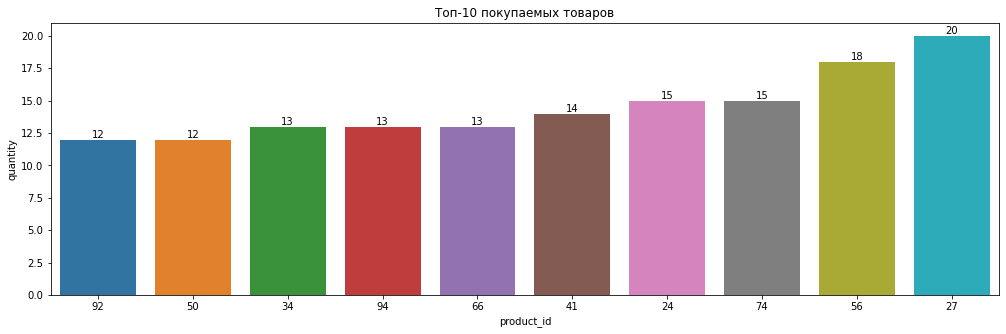

In [66]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(data=products_sold, x='product_id', y='quantity',
            order=products_sold.sort_values('quantity').product_id, ax=ax)

ax.bar_label(ax.containers[0])
ax.set_title('Топ-10 покупаемых товаров')

### 4

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:

- __Максимальное число товаров было продано 4 декабря__    
- 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день  
- __Меньше всего товаров было приобретено 6 декабря__    
- 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день  
- 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день  
- Меньше всего продуктов было приобретено 4 декабря  
- __4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день__    
- __8 и 9 декабря было продано примерно одинаковое число товаров__  

In [72]:
solds_by_day = df.groupby('date', as_index=False).quantity.sum()
solds_by_day

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

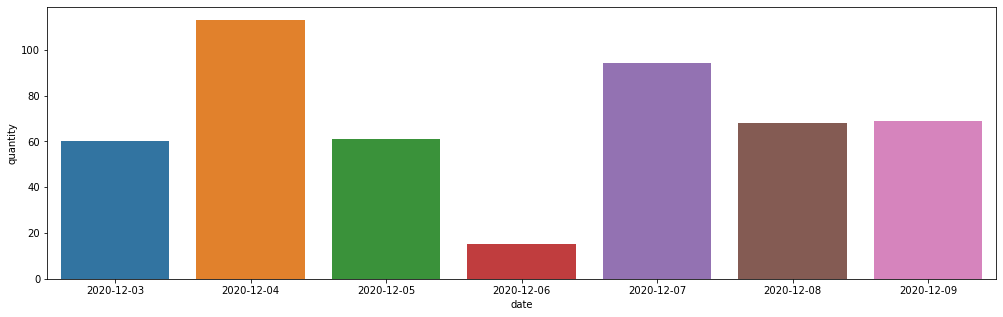

In [74]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(data=solds_by_day, x='date', y='quantity', ax=ax)

### 5 💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [ ]:
product_id quantity name              date
25         2        Katya Skriptsova  2020-12-05
54         1        Olya Silyutina    2020-12-05    
7          4        Katya Skriptsova  2020-12-05  
6          4        Sasha Tsarev      2020-12-06
6          1        Sasha Tsarev      2020-12-06
7          5        Katya Skriptsova  2020-12-06 

In [85]:
same_product = df.groupby(['name', 'product_id']).date.nunique().sort_values(ascending=False)
same_product.loc[same_product > 1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64